# Recursieve functies

Functies kunnen andere functies aanroepen, inclusief zichzelf. In deze notebook bekijken we wat er gebeurd wanneer functies elkaar aanroepen, of zelfs zichzelf (recursie).

## Local en global frame
Telkens wanneer een functie wordt aangeroepen, wordt er een nieuwe lokale *frame* gemaakt waarin de variabelen van die functie zitten. De parameters van de functie, zeg maar de input-variabelen, horen daar ook bij. Nadat een functie beëindigd is, worden alle variabelen die tot die functie behoren, verwijderd. Een functie heeft enkel toegang tot haar eigen frame en het global frame, al raden we ten sterkste aan om enkel waarden naar een functie te communiceren via de parameters van die functie.

Volgend voorbeeld laat zien dat varabelen binnen een functie inderdaad lokaal zijn:

In [26]:
def veranderWaarde(A):
    A=5
    B=7
    print("(local) A =",A)
    print("(local) B =",B)
    return 3*A

A=3
B=8
C=veranderWaarde(12+1)
print("(global) A =",A)
print("(global) B =",B)
print("(global) C =",C)

(local) A = 5
(local) B = 7
(global) A = 3
(global) B = 8
(global) C = 15


Bekijk de code hierboven zeker ook eens in [Python tutor](https://pythontutor.com/visualize.html#code=def%20veranderWaarde%28A%29%3A%0A%20%20%20%20A%3D5%0A%20%20%20%20B%3D7%0A%20%20%20%20print%28%22%28local%29%20A%20%3D%22,A%29%0A%20%20%20%20print%28%22%28local%29%20B%20%3D%22,B%29%0A%20%20%20%20return%203*A%0A%0AA%3D3%0AB%3D8%0AC%3DveranderWaarde%2812%2B1%29%0Aprint%28%22%28global%29%20A%20%3D%22,A%29%0Aprint%28%22%28global%29%20B%20%3D%22,B%29%0Aprint%28%22%28global%29%20C%20%3D%22,C%29&cumulative=false&curInstr=7&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false). Volgende afbeelding illustreert de inhoud van het geheugen tijdens de uitvoer van `veranderwaarde(12+1)`, net na het uitvoeren van regel 3:
![alt text](images/globalLocal1.jpg "Global en local frame")

De waarden van `A` en `B` in het hoofdprogramma maken deel uit van het *global frame*, de waarden van `A` en `B` in `veranderWaarde` maken deel uit van het *local frame* van `veranderWaarde`. Eens de functie `veranderWaarde` is afgelopen, verdwijnt ook het frame van de functie. Alle variabelen daar zijn dus weg, enkel de returnwaarde blijft bewaard en werd toegekend aan `C`. Het frame net na de uitvoering van regel 10 (`C=veranderWaarde(12+1)`) ziet er dus uit als volgt:
![alt text](images/globalLocal2.jpg "Global en local frame")

Ook we nu opnieuw `veranderWaarde` zouden aanroepen, dan wordt opnieuw een local frame voor deze functie gemaakt en na afloop terug verwijderd. Het nieuwe local frame heeft niets met het vorige local frame te maken en neemt ook geen waarden over uit het vorige local frame. Bekijk bijvoorbeeld volgend programma:

In [27]:
def veranderWaarde(A):
    A=5
    B=7
    print("(local) A =",A)
    print("(local) B =",B)
    return 3*A

A=3
B=8
C=veranderWaarde(12+1)
print("(global) A =",A)
print("(global) B =",B)
print("(global) C =",C)
veranderWaarde(C)

(local) A = 5
(local) B = 7
(global) A = 3
(global) B = 8
(global) C = 15
(local) A = 5
(local) B = 7


15

De inhoud van het geheugen wanneer we op lijn 1 zitten van de aanroep oplijn 14 van `veranderWaarde` is als volgt:
![alt text](images/globalLocal3.jpg "Global en local frame")

## Functies die andere functies aanroepen

Ook wanneer functies andere functies aanroepen, wordt er steeds een nieuwe frame aangemaakt, een per functie die actief is. Merk op dat een functie maar 1 andere functie tegelijk kan oproepen (we beschouwen *multi-threading* niet in deze cursus). Op elk moment hebben we dus een lijst van functies $f_1$, $f_2$, ..., $f_k$ waarbij $f_1$ in het hoofdprogramma werd opgeroepen, $f_2$ in $f_1$, ..., $f_k$ in $f_{k+1}$ en waarbij $f_k$ de functie is die op dat moment actief is. Dit noemen we de *call stack*. 

Waarom noemen we dit een *stack*? Omdat het zich exact zoals een stack gedraagt. Als $f_k$ een functie $f_{k+1}$ aanroept, wordt die op het einde toegevoegd (*push*) en krijgen we $f_1$, $f_2$, ..., $f_k$, $f_{k+1}$. Als $f_{k+1}$ afgelopen is, verdwijnt het laatste element (*pop*) en krijgen we opnieuw $f_1$, $f_2$, ..., $f_k$. Roept $f_k$ nu een andere functie $g$ aan (*push*), dan wordt de call stack $f_1$, $f_2$, ..., $f_k$, $g$.

Op elk moment in het programma zal naast het global frame, ook voor elke functie in de call stack een local frame bestaan. *Het is essentiel om te begrijpen dat geen enkele functie toegang heeft tot het local frame van eender welke andere functie op de call stack.* Een funcie heeft enkel toegang tot haar eigen local frame en in beperkte mate tot de global frame, al raden we ten zeerste af om in een functie gebruik te maken van de toegang tot de global frame. Communicatie tussen aanroepende en aangeroepen functie kan dus enkel en uitsluitend via de parameters (input van aanroepende naar aangeroepen functie) en return (output van aangeroepen naar de aanroepende functie).

We illustreren dit principe in het volgende stukje code dat gebruikt kan worden om het [vermoeden van Goldbach](https://nl.wikipedia.org/wiki/Vermoeden_van_Goldbach) (elk geheel getal groter dan 2 kan geschreven worden als de som van 2 niet noodzakelijk verschillende priemgetallen) te testen:

In [28]:
def deler(d,x):
    if d>x: 
        return False
    while x>=d:
        x-=d
    return x==0

def priem(x):
    for d in range(2,x):
        if deler(d,x):
            return False
    return True
    
def somVanTweePriemen(s):
    for x in range(2,s):
        if priem(x) and priem(s-x):
            return (x,s-x)
    return None

print(somVanTweePriemen(7))
print(somVanTweePriemen(10))

(2, 5)
(3, 7)


Bekijk het stukje code ook in [Python Tutor]()
Bij de start van de eerste aanroep van `somVanTweePriemen(7)` ziet het geheugen er als volgt uit:
![alt text](images/globalLocalEx1.jpg "Goldbach ex 1")

We hebben twee frames: de global frame en de frame van de aanroep `somVanTweePriemen(7)`. Binnen deze functie krijgt `x` waarde 2 en moet de uitdrukking `priem(2) and priem(5)` geëvalueerd worden. Hiervoor zal eerst `Priem(2)` uitgevoerd worden.

Bij het begin van de uitvoer van `priem(2)` zijn er dus 3 frames; het frame van `priem` is erbij gekomen. Merk op dat de loop-variabele `x` aan het frame van `somVanTweePriemen` werd toegevoegd. 
![alt text](images/globalLocalEx2.jpg "Goldbach ex 2")

`Priem(2)` stopt bijna onmiddelijk en geeft `True`. De local frame van `priem` verdwijnt uit het geheugen. Daarna wordt de tweede term van de conjunctie `priem(2) and priem(5)` geëvalueerd en wordt er dus een nieuwe local frame, dit maal voor `priem(5)` aangemaakt:
![alt text](images/globalLocalEx3.jpg "Goldbach ex 3")
Nu gaan we de for-loop wel in, en wordt `deler(2,5)` aangeroepen. Er wordt dus opnieuw een local frame toegevoegd, dit maal voor `deler`:
![alt text](images/globalLocalEx4.jpg "Goldbach ex 4")
En zo gaat dit nog een tijdje door en groeit en krimpt de call stack tot we op het einde het paar `(2,5)` als output geven. De call stack net voordat de call `priem(5)` eindigt, ziet er bijvoorbeeld als volgt uit:
![alt text](images/globalLocalEx5.jpg "Goldbach ex 5")
Daarna herhaalt de hele procedure zich voor `somVanTweePriemen(10)`, met bijvoorbeeld volgende call stack als tussentijds resultaat:
![alt text](images/globalLocalEx6.jpg "Goldbach ex 5")


## Recursieve functies

Ook wanneer een functie zichzelf aanroept, worden er aparte frames aangemaakt, voor elke aanroep 1. En ook hier geldt dat een aangeroepen functie geen toegang heeft tot de variabelen van de aanroepende functie, zelfs niet als een functie door zichzelf wordt aangeroepen. Als $f$ zichzelf aanroept, dan bevat de call stack twee local frames voor $f$, voor elke instantie een.

We illustreren dit best met een voorbeeld; we gaan een functie maken die volgend probleem oplost: 
*Bij het oplopen van een trap kan je telkens 1 of 2 treden tegelijk nemen; op hoeveel manieren kan je een trap met n treden oplopen?* Bijvoorbeeld, als we een trap met 5 treden hebben, kunnen we die oplopen als volgt: 1-1-1-1-1, 1-1-1-2, 1-1-2-1, 1-2-1-1, 2-1-1-1, 1-2-2, 2-1-2, 2-2-1; op 8 manieren dus. Deze 8 manieren kunnen we opsplitsen in twee groepen:
- Beginnend met een kleine stap: 1-1-1-1-1, 1-1-1-2, 1-1-2-1, 1-2-1-1, 1-2-2
- Beginnend met een grote stap: 2-1-1-1, 2-1-2, 2-2-1

Merk op dat de manieren waarbij we met een kleine stap begonnen, telkens beginnen met 1- en vervolgens met alle manieren om de overige 4 treden op te lopen. Het aantal manieren om een trap van hoogte 5 op te lopen en waarbij we met 1 trede beginnen is dus exact gelijk aan het aantal manieren om een trap van hoogte 4 op te lopen. Idem voor het beginnen met en grote stap: die beginnen allen met 2- gevolgd door een manier om een trap met 3 treden op te lopen. Het aantal manieren om een stap met 5 treden op te lopen is dus exact gelijk aan het aantal manieren om een trap van hoogte 4 op te lopen plus het aantal manieren om een trap van hoogte 3 op te lopen. Als we $M(n)$ gebruiken om het aantal manieren om een trap van hoogte $n$ op te lopen, hebben we dus volgende wiskundige, recursieve formule:

$$M(0)=1, M(1)=1, \forall n>1: M(n)=M(n-1)+M(n-2)$$

Dit principe zullen we als volgt in code gieten: 
- Een functie `manieren(n)` die berekent op hoeveel manieren we een trap met `n` treden kunnen oplopen
- Behandel de basisgevallen `n==0` en `n==1`: geef `1` terug.
- Anders: geef `manieren(n-1) + manieren(n-2)` terug.

In [29]:
def manieren(n):
    if n<2:
        return 1
    else:
        return manieren(n-1)+manieren(n-2)
    
print(manieren(5))

8


In deze functie roept `manieren` twee maal zichzelf aan. Bij die aanroep wordt er een nieuwe instantie van de functie gestart met een eigen frame. Dit frame verdwijnt pas nadat de functie is afgelopen. Dus, als we `manieren(5)` aanroepen, dan roept die eerst `manieren(4)` aan om de eerste term in de som `manieren(n-1)+manieren(n-2)` te berekenen. `manieren(4)` roept dan weer eerst `manieren(3)` aan, `manieren(3)` roept `manieren(2)` aan en uiteindelijk roept die `manieren(1)` aan. 

Er zijn dus tegelijk oproepen `manieren(5)`, `manieren(4)`, ..., `manieren(1)` actief, elk met een eigen frame, met een eigen versie van de parameter (input-variabele) `n`. Dit wordt ook mooi geïllustreerd in [Python Tutor](http://www.pythontutor.com/visualize.html#code=def%20manieren%28n%29%3A%0A%20%20%20%20if%20n%3C2%3A%0A%20%20%20%20%20%20%20%20return%201%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20return%20manieren%28n-1%29%2Bmanieren%28n-2%29%0A%20%20%20%20%0Aprint%28manieren%285%29%29&cumulative=false&curInstr=14&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) :

![](images/manierenFrames.jpg)

Wanneer we een recursieve functie schrijven is het erg belangrijk om steeds een basisgeval te voorzien en *eerst* te testen of we in een basisgeval zitten alvorens de recursieve aanroepen te doen. Mocht je dit vergeten zijn, of indien jouw recursieve aanroepen een fout maken bij de parameters, dan zal de functie oneindig recursieve aanroepen blijven doen, en telkens een frame aanmaken. Deze frames komen in het geheugen op een "stapel" (*stack*) terecht; als we het basisgeval vergeten, loopt het geheugen voorzien voor deze stapel vol en eindigt het programma. Python heeft standaard een maximale recursie-diepte van 1000, wat wil zeggen dat indien er meer dan 1000 frames op de *stack* staan, Python de uitvoering van het programma stillegt om te vermijden dat de stapel "over loopt". Je krijgt dan volgende foutmelding: 

In [30]:
def manieren(n):
    return manieren(n-1)+manieren(n-2)
    
print(manieren(5))

RecursionError: maximum recursion depth exceeded

## Gebruik van recursie

Recursie wordt vaak gebruikt voor problemen die kunnen opgesplitst worden in kleinere deelproblemen van dezelfde soort; bijvoorbeeld, bij het traplopen konden we een moeilijk probleem ("trap met $n$ treden oplopen") opsplitsen in twee net iets makkelijkere problemen ("trap met $n-1$ treden oplopen" en "trap met $n-2$ treden oplopen"). Deze strategie kunnen we voor veel problemen toepassen. Dit wordt uitgelegd in de notebook *Divide and Conquer strategieën* die tot uitbreidingsmateriaal behoort. Hier beperken we ons tot enkele klassieke voorbeelden.

### Algoritme van Euclides voor grootste gemene deler

In de notebook *Algoritme van Euclides* zagen we een klassiek algoritme om de grootste gemene deler van twee getallen te berekenen:

Dit algoritme werd vervolgens geïmplementeerd met behulp van een dubbele while loop (we geven hier de implementatie in de vorm van een functie):

In [31]:
def GGD(A,B):
    while B!=0: 
        # stap 2
        while B<=A:
            A = A - B

        # wissel A en B om
        T=A
        A=B
        B=T
    return A

print(GGD(16,34))
print(GGD(16,8))

2
8


We zouden er echter ook voor kunnen opteren om stap 4 (zo niet, herhaal het algoritme) te implementeren door *recursief de functie GGD opnieuw aan te roepen*; immers: de oplossing bestaat eruit om *hetzelfde* te doen maar met andere getallen. Dit geeft dan volgende implementatie: 

In [32]:
def GGD(A,B):
    if B==0:
        return A
    
    while B<=A:
        A = A - B

    return GGD(B,A) # recursieve aanroep van GGD!

print(GGD(16,34))
print(GGD(16,8))

2
8


Merk op dat het uiteraard essentieel is om heet basisgeval `B==0` in het begin van de functie te behandelen omdat de functie anders oneindig doorgaat (of toch tot Python er genoeg van heeft omdat de maximale recursiediepte bereikt werd).

### Fractalen
Een andere klassieker is het maken van fractalen. Fractalen zijn figuren die zichzelf herhalen en worden gevormd via een recursieve definitie. Beschouw bijvoorbeeld volgende [*Sierpinski fractaal*](https://nl.wikipedia.org/wiki/Driehoek_van_Sierpi%C5%84ski):
![](images/Sierpinski.png)

Als we deze figuur in detail bekijken, zien we dat de Sirpinski driehoek bestaat uit drie gestapelde Sierpinski driehoeken van halve grootte; twee aan de basis en één bovenaan. Dit geeft dus volgend algoritme:

(Met de stelling van Pythagoras kan je makkelijk nagaan dat de hoogte van een gelijkzijdige driehoek met zijde $\frac{b}{2}$, $\frac{\sqrt(3)}{4}b$ is.)

Wanner we dit programmeren kunnen we niet oneindig doorgaan, dus stoppen we als de Sierpinski driehoek te klein wordt; dan tekenen we gewoon een driehoek. Als "te klein" nemen we bijvoorbeeld `b<=5`. Dit geeft de volgende code: 

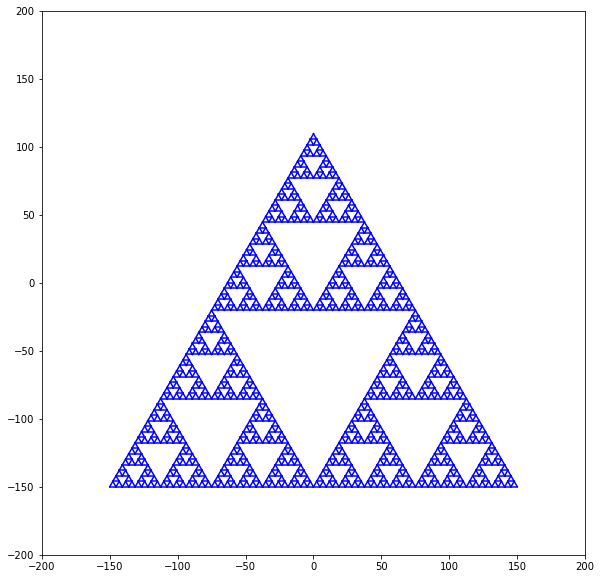

In [44]:
from turtle import *
from math import sqrt

def sierpinski(b,x,y):
    if b<=5:
        penup()
        goto(x,y)
        pendown()
        for i in range(3):
            forward(b)
            left(120)
    else:
        h=sqrt(3)*b/4
        sierpinski(b/2,x,y)
        sierpinski(b/2,x+b/2,y)
        sierpinski(b/2,x+b/4,y+h)

reset()
sierpinski(300,-150,-150)